##### aimldl >python3 > packages > tensorflow > tutorials > beginners > 1_2_1-basic_image_classification-fashion_MNIST.ipynb

* This notebook is a replica of [Basic classification: Classify images of clothing](https://www.tensorflow.org/tutorials/keras/classification) with some comments.
  * [TensorFlow](https://www.tensorflow.org/) > [Learn](https://www.tensorflow.org/learn) > [TensorFlow Core](https://www.tensorflow.org/overview) > [Tutorials](https://www.tensorflow.org/tutorials) > ML basics with Keras > [Basic image classification](https://www.tensorflow.org/tutorials/keras/classification)
* It is prerequisite to install TensorFlow 2.0 & Keras.

* I've added a part to improve the tutorial:
  * Visualization of the Performance Metric: loss and accuracy

# Basic classification: Classify images of clothing
This section explain image Classion of the Fashion MNIST Dataset.

### About the Fashion MNIST dataset
* The [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) consists of 70k gray scale images (60k for training and 10k for testing).
* There are 10 categories (just like the MNIST dataset).
* Each image is a 28x28 pixel gray scale image which belongs to one of 10 categories.
* In other words, each image is associated with a label from 10 classes.

| Label | Description |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |


<img src="https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png">

<img src="https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/embedding.gif">

### Why the Fashion MNIST Dataset?
* According to [Zalando](#https://github.com/zalandoresearch/fashion-mnist), MNIST is too easy, overused, and can not represent the modern computer vision tasks.
* Not only CNNs (Convolutional Neural Networks), but also classic machine learning algorithms can achieve 99.7% on MNIST easily. 

## Source Code

### Import Necessary Modules

In [1]:
import matplotlib.image as img

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

Notice the TensorFlow version is 2.0.0.

In [3]:
print(tf.__version__)

2.0.0


### Import the Fashion MNIST dataset

In [4]:
# Import the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

60k images are used to train the network and 10k images to evaluate the network.

### Explore the Data

In [5]:
[train_images.shape, test_images.shape]

[(60000, 28, 28), (10000, 28, 28)]

In [6]:
[train_labels.shape, test_labels.shape]

[(60000,), (10000,)]

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

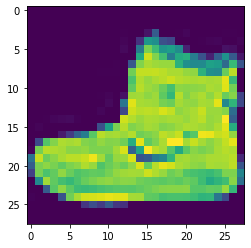

In [9]:
plt.imshow( train_images[0, ] )

In [10]:
train_labels[0]

9

Let's check which label is 9. Ankle boot!

| Label | Description |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

Variable class_names defines the class name with respect to a label.

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

See below how a class name is retrieved with respect to the label index.

In [12]:
[ class_names[0], class_names[1], class_names[9] ]

['T-shirt/top', 'Trouser', 'Ankle boot']

Another example is from test_images. A randomly chosen example of 837 is 6 or shirt.

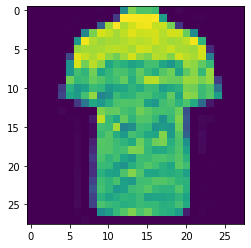

In [13]:
plt.imshow( test_images[837] )

In [14]:
test_labels[837]

6

### Preprocess the data

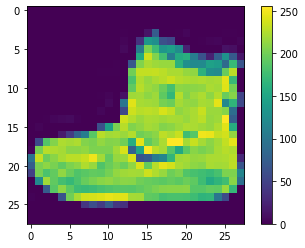

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Notice the max value of the color bar is 255.

In [16]:
np.max( train_images[0] )

255

The values in the image range from 0 to 255. These values are normalized to the range of 0 to 1. A neural network model expects the input ranges between 0 to 1.

In [17]:
train_images = train_images / 255.0
test_images = test_images / 255.0

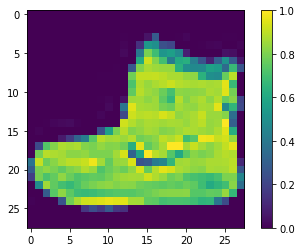

In [18]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

The range of the pixel values is, now, between 0 and 1.

Display 25 images with class names.

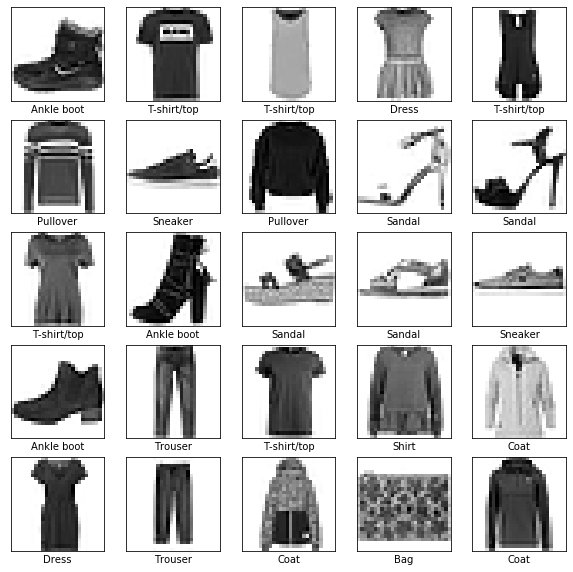

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Build the model
#### Set up the layers
* tf.keras.layers.Flatten
  * transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). 
* The network consists of a sequence of two tf.keras.layers.Dense layers.
  * The first Dense layer has 128 nodes (or neurons).
  * The second layer has 10 nodes with softmax activation function.
    * 10 nodes are assigned because there are 10 classes.
    * Each node returns the probability that the current image belongs to one of the 10 classes.
    * Therefore this layer outputs an array of 10 probability scores that sum to 1.

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

### Compile the model
A few more settings are done during model's compile step:
* Loss function
* Optimizer
* (Performance) Metrics

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model
Training the data is the same as fitting the network's weights to the training data and labels.
* Input data: train_images
* Output labels: train_labels

This entire training data and labels are fed into the network as much as epoch.

In [22]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.5020 - accuracy: 0.8243
Epoch 2/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.3774 - accuracy: 0.8651
Epoch 3/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.3376 - accuracy: 0.8772
Epoch 4/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.3134 - accuracy: 0.8861
Epoch 5/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2951 - accuracy: 0.8912
Epoch 6/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2786 - accuracy: 0.8974
Epoch 7/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.2689 - accuracy: 0.9002
Epoch 8/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2563 - accuracy: 0.9043
Epoch 9/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2478 - accuracy: 0.9081
Epoch 10/10
60

In other words, the epoch is the number of times the data/labels is fed to the network. To interpret the above output, the 60k pairs of images and the corresponding lables, traing_images and train_labels, are fed into the network 10 times. At each time, loss and accuracy are calculated. As you can see, loss drops (0.4998, 0.3764, ..., 0.2424) and accuracy increases (0.8238, 0.8643, ..., 0.9093) over time. We call this phenomenon as "learning". The network has learned a better set of internal weights that fits to the input data and the output label.

### Visualization of the Performance Metric: loss and accuracy
This part is not in the tutorial. It's more intuitive to visualize the performance metric (accuracy and loss) in a plot.

In [23]:
history = model.fit(train_images, train_labels, epochs=10)
history_dict = history.history
loss     = history_dict['loss']
accuracy = history_dict['accuracy']

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2328 - accuracy: 0.9122
Epoch 2/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2231 - accuracy: 0.9165
Epoch 3/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2147 - accuracy: 0.9191
Epoch 4/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2095 - accuracy: 0.9210
Epoch 5/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2028 - accuracy: 0.9236
Epoch 6/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.1988 - accuracy: 0.9248
Epoch 7/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.1950 - accuracy: 0.9269
Epoch 8/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.1876 - accuracy: 0.9302
Epoch 9/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.1844 - accuracy: 0.9312
Epoch 10/10
60

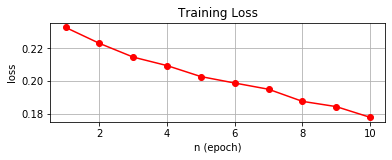

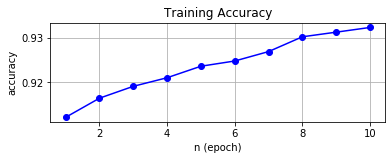

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

n = range(1, len(loss)+1 )  # n is epochs

plt.subplot(2,1,1)
plt.plot( n, loss, 'ro' )
plt.plot( n, loss, 'r' )
plt.title('Training Loss')
plt.xlabel('n (epoch)')
plt.ylabel('loss')
plt.grid()
plt.show()

plt.subplot(2,1,2)
plt.plot( n, accuracy, 'bo' )
plt.plot( n, accuracy, 'b' )
plt.title('Training Accuracy')
plt.xlabel('n (epoch)')
plt.ylabel('accuracy')
plt.grid()
plt.show()

Notice the last model or a model at epoch 10 is used later.

### Evaluate accuracy
The process to test the trained model is called evaluation. The model is tested by the test data and labels.

In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 0.2481 - accuracy: 0.8871

Test accuracy: 0.8871


Notice the accuracy on the test dataset (0.8774) is lower than the accuracy on the training dataset at the last epoch (0.9093).

> This gap between training accuracy and test accuracy represents overfitting. Overfitting is when a machine learning model performs worse on new, previously unseen inputs than on the training data.

In [26]:
# TODO: May I change to other training model?

### Make predictions
This section presents how to make prediction on an input image. In this process, the essence of accuracy calculation can be explained.

In [27]:
predictions = model.predict(test_images)

In [28]:
predictions.shape

(10000, 10)

* A prediction is an array of 10 numbers (because we have 10 output neurons).
* They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing.

In [29]:
predictions[0]

array([2.2128933e-10, 9.9116279e-12, 8.4438463e-12, 7.1459496e-18,
       4.0516024e-12, 3.8236012e-05, 4.5176913e-12, 1.3894674e-04,
       1.2327047e-09, 9.9982280e-01], dtype=float32)

Note the 10 numbers sum to 1.

In [30]:
np.sum( predictions[0] )

1.0

To get the highest confidence value, use argmax:

In [31]:
np.argmax(predictions[0])

9

Note the

In [32]:
test_labels[0]

9

In [33]:
class_names[9]

'Ankle boot'

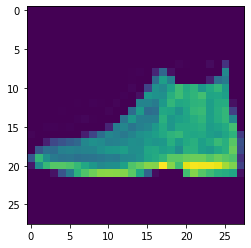

In [34]:
plt.imshow( test_images[0] )

Note: plot_image2 & plot_value_array2 are my modification to plot_image & plot_value_array in the tutorial. They work alike. show_prediction is also defined by me, but works the same as the tutorial.

In [35]:
def plot_image2(i, predictions_array, true_label, img):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Predicted {:2.0f}% {}".format( 100*np.max(predictions_array),
                                   class_names[predicted_label]),
                                   color=color )
  plt.title( "{}th input: {}".format(i, class_names[true_label]) )

In [36]:
def plot_value_array2( predictions_array, true_label, use_class_names=False ):
  plt.grid(False)
  if use_class_names:
    _ = plt.xticks(range(10), class_names, rotation=90)
  else:
    plt.xticks(range(10))
  #plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  plt.title( "Probability" )

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [37]:
def show_prediction( i ):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image2(i, predictions[i], test_labels[i], test_images[i])
  plt.subplot(1,2,2)
  plot_value_array2(predictions[i], test_labels[i])
  plt.show()

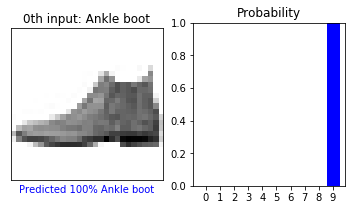

In [38]:
show_prediction( 0 )

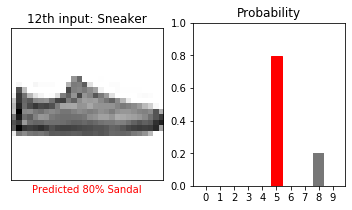

In [39]:
show_prediction( 12 )

> Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

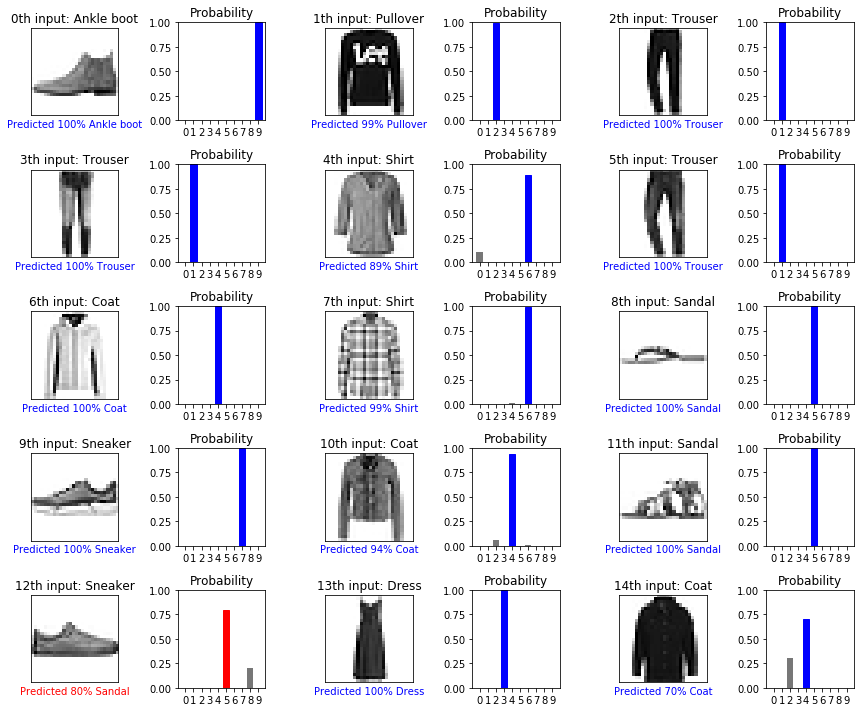

In [40]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image2(i, predictions[i], test_labels[i], test_images[i])
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array2(predictions[i], test_labels[i])
plt.tight_layout()
plt.show()

In [41]:
# Grab an image from the test dataset.
i = 1
img = test_images[i]
print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(28, 28)
(1, 28, 28)


In [42]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.1005390e-05 1.3131505e-18 9.9044842e-01 9.9644041e-15 9.5304372e-03
  1.2931850e-13 1.0138331e-05 1.2512283e-14 3.1604175e-14 2.8822608e-15]]


In [43]:
np.argmax(predictions_single[0])

2

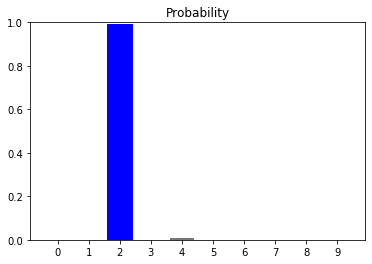

In [44]:
plot_value_array2( predictions_single[0], test_labels[i] )

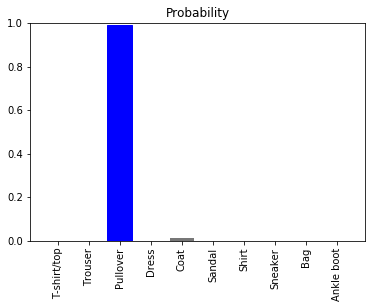

In [45]:
plot_value_array2( predictions_single[0], test_labels[i], use_class_names=True )